In [69]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [70]:
class BatsmanState(TypedDict):
    name: str
    runs: int
    balls: int
    fours: int
    sixes: int

    strikerate: float
    boundary_percentage: float
    boundary_strikerate: float
    summary: str

In [71]:
def calculate_strikerate(state: BatsmanState) -> BatsmanState:
    state["strikerate"] = (state["runs"] / state["balls"]) * 100
    return {"strikerate": state["strikerate"]}

def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState:
    total_boundaries = state["fours"] + state["sixes"]
    state["boundary_percentage"] = (total_boundaries / state["balls"]) * 100
    return {"boundary_percentage": state["boundary_percentage"]}

def calculate_boundary_strikerate(state: BatsmanState) -> BatsmanState:
    total_boundary_runs = (state["fours"] * 4) + (state["sixes"] * 6)
    state["boundary_strikerate"] = (total_boundary_runs / state["balls"]) * 100
    return {"boundary_strikerate": state["boundary_strikerate"]}

def summarize_batsman(state: BatsmanState) -> BatsmanState:
    summary = (f"{state['name']} scored {state['runs']} runs off {state['balls']} balls "
               f"with a strike rate of {state['strikerate']:.2f}%. "
               f"He hit {state['fours']} fours and {state['sixes']} sixes, "
               f"which is {state['boundary_percentage']:.2f}% of his total deliveries.")
    state["summary"] = summary
    return {"summary": state["summary"]}

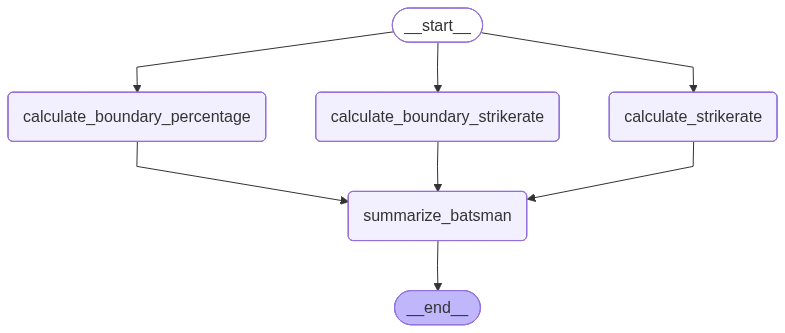

In [72]:
graph = StateGraph(BatsmanState)

graph.add_node("calculate_strikerate", calculate_strikerate)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("calculate_boundary_strikerate", calculate_boundary_strikerate)
graph.add_node("summarize_batsman", summarize_batsman)

graph.add_edge(START, "calculate_strikerate")
graph.add_edge(START, "calculate_boundary_percentage")
graph.add_edge(START, "calculate_boundary_strikerate")

graph.add_edge("calculate_strikerate", "summarize_batsman")
graph.add_edge("calculate_boundary_percentage", "summarize_batsman")
graph.add_edge("calculate_boundary_strikerate", "summarize_batsman")
graph.add_edge("summarize_batsman", END)

workflow = graph.compile()

from IPython.display import display
display(workflow)

In [73]:
Initial_state = BatsmanState(
    name="AJ",
    runs=100,
    balls=50,
    fours=6,
    sixes=4,
    strikerate=0.0,
    boundary_percentage=0.0,
    boundary_strikerate=0.0,
    summary=""
)

final_state = workflow.invoke(Initial_state)

print(final_state)

{'name': 'AJ', 'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'strikerate': 200.0, 'boundary_percentage': 20.0, 'boundary_strikerate': 96.0, 'summary': 'AJ scored 100 runs off 50 balls with a strike rate of 200.00%. He hit 6 fours and 4 sixes, which is 20.00% of his total deliveries.'}
